In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("../../data/kospi/price.csv", index_col='date', parse_dates=True)
sn = pd.read_csv("../../data/kospi/share_number.csv", index_col='date', parse_dates=True)
pm = pd.read_csv("../../data/kospi/price_mod.csv", index_col = 'date', parse_dates = True)

# quality
gp_t = pd.read_csv("../../data/kospi/gross_profit.csv", index_col='date', parse_dates=True)
ast_t = pd.read_csv("../../data/kospi/asset.csv", index_col='date', parse_dates=True)
lb_t = pd.read_csv("../../data/kospi/liability.csv", index_col = 'date', parse_dates = True)
cf_t = pd.read_csv("../../data/kospi/cashflow.csv", index_col = 'date', parse_dates = True)
sl_t = pd.read_csv("../../data/kospi/sales.csv", index_col = 'date', parse_dates = True)

# value
per_t = pd.read_csv("../../data/kospi/per.csv", index_col = 'date', parse_dates = True)
pbr_t = pd.read_csv("../../data/kospi/pbr.csv", index_col = 'date', parse_dates = True)
psr_t = pd.read_csv("../../data/kospi/psr.csv", index_col = 'date', parse_dates = True)
pcr_t = pd.read_csv("../../data/kospi/pcr.csv", index_col = 'date', parse_dates = True)

In [7]:
# 삼성전자 제외
del df['A005930'], sn['A005930'], pm['A005930'], gp_t['A005930'], ast_t['A005930'], lb_t['A005930']
del cf_t['A005930'], sl_t['A005930'], per_t['A005930'], pbr_t['A005930'], psr_t['A005930'], pcr_t['A005930']

In [8]:
m = 15

market_cap = df * sn
market_cap.index = market_cap.index + pd.tseries.offsets.MonthEnd(0)
m_cap = market_cap.groupby('date').last()

pm.index = pm.index + pd.tseries.offsets.MonthEnd(0)
m_pm = pm.groupby('date').last()
m_ret = (m_pm.fillna(-1) / m_pm.shift(1)).clip(0, 10) - 1

gp = pd.DataFrame(index=m_ret.index).join(gp_t).shift(m)
ast = pd.DataFrame(index=m_ret.index).join(ast_t).shift(m)
lb = pd.DataFrame(index=m_ret.index).join(lb_t).shift(m)
cf = pd.DataFrame(index=m_ret.index).join(cf_t).shift(m)
sl = pd.DataFrame(index=m_ret.index).join(sl_t).shift(m)

df.index = df.index + pd.tseries.offsets.MonthEnd(0)
m_df = df.groupby('date').last()

per = per_t.shift(m)
pbr = pbr_t.shift(m)
psr = psr_t.shift(m)
pcr = pcr_t.shift(m)

In [9]:
# quality
pivot = 12

# 수익성 팩터
gpoa = gp/ast # gross profit over asset
cfoa = cf/ast # cashflow profit over asset
gmar = gp/sl  # gross margin
turn = sl/ast

# 성장성 팩터(수익성 팩터, 5년 전과 비교해서 변화 정도 / 총자산)
gpoa_d = (gpoa - gpoa.shift(pivot))/ ast.shift(pivot)
cfoa_d = (cfoa - cfoa.shift(pivot))/ ast.shift(pivot)
gmar_d = (gmar - gmar.shift(pivot))/ sl.shift(pivot)
turn_d = sl/ast - sl.shift(12)/ast.shift(12)

# 안정성 팩터
lev = lb/ast # 총부채 / 총자산
gpvol = gpoa.rolling(pivot).std()  # gross profit volatility
cfvol = cfoa.rolling(pivot).std()  # cashflow volatility

gpoa_rank = gpoa.rank(axis=1, ascending=False)
cfoa_rank = cfoa.rank(axis=1, ascending=False)
gmar_rank = gmar.rank(axis=1, ascending=False)
turn_rank = turn.rank(axis=1, ascending=False)
gpoa_d_rank = gpoa_d.rank(axis=1, ascending=False)
cfoa_d_rank = cfoa_d.rank(axis=1, ascending=False)
gmar_d_rank = gmar_d.rank(axis=1, ascending=False)
turn_d_rank = turn_d.rank(axis=1, ascending=False)
lev_rank = lev.rank(axis=1)
gpvol_rank = gpvol.rank(axis=1)
cfvol_rank = cfvol.rank(axis=1)

gpoa_z = (gpoa_rank.T - gpoa_rank.mean(axis=1)) / gpoa_rank.std(axis=1)
cfoa_z = (cfoa_rank.T - cfoa_rank.mean(axis=1)) / cfoa_rank.std(axis=1)
gmar_z = (gmar_rank.T - gmar_rank.mean(axis=1)) / gmar_rank.std(axis=1)
turn_z = (turn_rank.T - turn_rank.mean(axis=1)) / turn_rank.std(axis=1)
gpoa_d_z = (gpoa_d_rank.T - gpoa_d_rank.mean(axis=1)) / gpoa_d_rank.std(axis=1)
cfoa_d_z = (cfoa_d_rank.T - cfoa_d_rank.mean(axis=1)) / cfoa_d_rank.std(axis=1)
gmar_d_z = (gmar_d_rank.T - gmar_d_rank.mean(axis=1)) / gmar_d_rank.std(axis=1)
turn_d_z = (turn_d_rank.T - turn_d_rank.mean(axis=1)) / turn_d_rank.std(axis=1)
lev_z = (lev_rank.T - lev_rank.mean(axis=1)) / lev_rank.std(axis=1)
gpvol_z = (gpvol_rank.T - gpvol_rank.mean(axis=1)) / gpvol_rank.std(axis=1)
cfvol_z = (cfvol_rank.T - cfvol_rank.mean(axis=1)) / cfvol_rank.std(axis=1)

total_qz = gpoa_z.T + cfoa_z.T + gmar_z.T + turn_z.T + gpoa_d_z.T + cfoa_d_z.T + gmar_d_z.T + turn_d_z.T + lev_z.T + gpvol_z.T + cfvol_z.T
total_qz = ((total_qz.T - total_qz.mean(axis=1)) / total_qz.std(axis=1)).T

In [10]:
# value
per_rank = per.rank(axis=1, pct=True)
pbr_rank = pbr.rank(axis=1, pct=True)
psr_rank = psr.rank(axis=1, pct=True)
pcr_rank = pcr.rank(axis=1, pct=True)

per_z = ((per_rank.T - per_rank.mean(axis=1)) / per_rank.std(axis=1))
pbr_z = ((pbr_rank.T - pbr_rank.mean(axis=1)) / pbr_rank.std(axis=1))
psr_z = ((psr_rank.T - psr_rank.mean(axis=1)) / psr_rank.std(axis=1))
pcr_z = ((pcr_rank.T - pcr_rank.mean(axis=1)) / pcr_rank.std(axis=1))

total_vz = per_z.T + pbr_z.T + psr_z.T + pcr_z.T

In [11]:
def MDD(arr):
    low = np.argmin(arr / np.maximum.accumulate(arr))
    high = np.argmax(arr[:low])
    return high, low, (arr[high] - arr[low]) / arr[high]

def hit_ratio(arr, r, recent_num_ratio=True):
    total = round(sum(arr > 0) / len(arr), 4)
    recent = round(sum(arr[-1*r:] > 0) / len(arr[-1*r:]), 4) if recent_num_ratio else sum(arr[-1*r:] > 0)
    return total, recent

In [35]:
vol_month = m_pm.rolling(60).std()
vol_day = ((pm / pm.shift(1)).clip(0, 10) - 1).rolling(60).std().groupby('date').last()
momentum_mask = m_pm.copy()
for i in range(6):
    momentum_mask[momentum_mask < m_pm.shift(i)] = m_pm.shift(i)[momentum_mask < m_pm.shift(i)]
momentum = (m_pm.shift(1) / m_pm.shift(4)) - (m_pm / momentum_mask) - vol_day * 1.5

momentum_mask = m_pm.shift(1).copy()
for i in range(9):
    momentum_mask[momentum_mask > m_pm.shift(i)] = m_pm.shift(i)[momentum_mask > m_pm.shift(i)]
momentum_mask = (m_pm.shift(1) / momentum_mask) < 2

momentum: high - 2007-08-31 00:00:00, low - 2008-11-30 00:00:00, mdd - 0.4924
momentum: high - 2018-05-31 00:00:00, low - 2020-03-31 00:00:00, mdd - 0.4515
value (hit): total - 0.5728, recent - 8


/Users/daeyoung/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


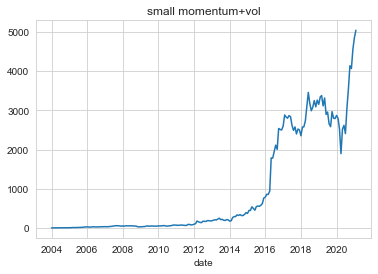

In [38]:
small_mask = m_cap.rank(axis=1, pct=True) < 0.1
sq_mask = total_qz[small_mask].rank(axis=1, pct=True) < 0.4
sv_mask = total_vz[small_mask].rank(axis=1, pct=True) < 0.4
sm_mask = momentum[sv_mask & momentum_mask].rank(axis=1, pct=True, ascending=False) < 0.4
sm_cap_weight = (m_cap[sm_mask].T / m_cap[sm_mask].sum(axis=1)).T

sm_r = m_ret[sm_mask.shift(1)].mean(axis=1).fillna(0)
sm_cr = (sm_r + 1).cumprod()[47:]

h, l, mdd = MDD(sm_cr.values)
print(f'momentum: high - {sm_cr.index[h]}, low - {sm_cr.index[l]}, mdd - {round(mdd, 4)}')
t = 90
h, l, mdd = MDD(sm_cr[t:].values)
print(f'momentum: high - {sm_cr[t:].index[h]}, low - {sm_cr[t:].index[l]}, mdd - {round(mdd, 4)}')

t, r = hit_ratio(sm_r.values[47:], 12, False)
print(f'value (hit): total - {t}, recent - {r}')

sns.set_style('whitegrid')
sns.lineplot(sm_cr.index, sm_cr)
plt.title('small momentum+vol')
plt.show()